<a href="https://colab.research.google.com/github/Muzammel571/Uber-Data-Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv ("UberDataset.csv")

In [ ]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
# Dataset shape
data.shape

(1156, 7)

In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing


In [ ]:
data ["PURPOSE"].fillna("NOT",inplace= True)

<ipython-input-7-35aa09666ee7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data ["PURPOSE"].fillna("NOT",inplace= True)


In [ ]:
data.head ()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# Converting  Date Columns
data ['START_DATE'] = pd.to_datetime (data['START_DATE'],errors = 'coerce')

data ['END_DATE'] = pd.to_datetime (data['END_DATE'],errors = 'coerce')

In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
from datetime import datetime

data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour

In [ ]:
data.head (2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0


In [ ]:
data['day-night'] = pd.cut (x=data['time'],bins = [0,10,15,19,24],labels = ['Morning','Afternoon','Evening','Night'])

In [ ]:
data.head (5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [ ]:
# Drop Duplicate
data.dropna(inplace = True)

In [ ]:
data.shape

(413, 10)

# Data Visulization

<Axes: xlabel='count', ylabel='CATEGORY'>

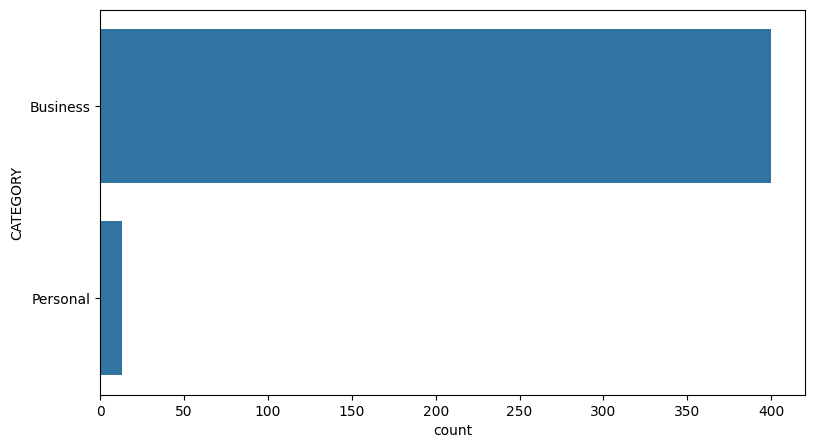

In [ ]:
# In which Category do people book the most Uber rides
plt.figure (figsize = (20,5))

plt.subplot (1,2,1)

sns.countplot(data ["CATEGORY"])



<Axes: xlabel='count', ylabel='PURPOSE'>

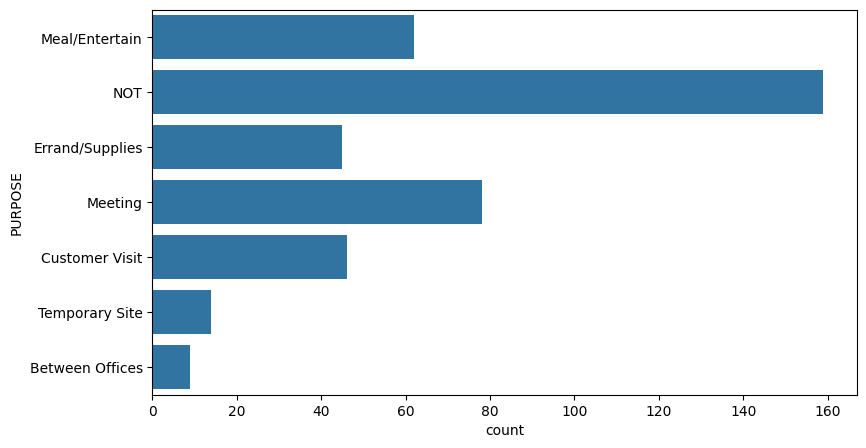

In [ ]:
# For which purpose do people book Uber rides the most
plt.figure (figsize = (20,5))
plt.subplot (1,2,2)
sns.countplot (data ["PURPOSE"])

<Axes: xlabel='count', ylabel='day-night'>

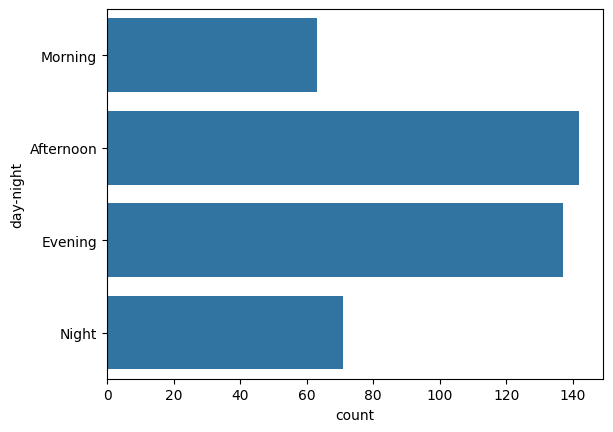

In [ ]:
# At what time do people book cabs most from Uber
sns.countplot(data['day-night'])

In [ ]:

# Check if the 'START_DATE' column exists and is in datetime format
if 'START_DATE' in data.columns:
    data['Month'] = pd.to_datetime(data['START_DATE'], errors='coerce').dt.month
else:
    raise KeyError("Column 'START_DATE' not found in the DataFrame.")

# Map month numbers to month names
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace the numeric month values with month names
data['MONTH'] = data['Month'].map(month_label)

# Count occurrences of each month
mon = data['MONTH'].value_counts().reindex(month_label.values(), fill_value=0)



In [ ]:
data.head ()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,MONTH
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1.0,Jan
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,Jan
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1.0,Jan
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1.0,Jan
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1.0,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

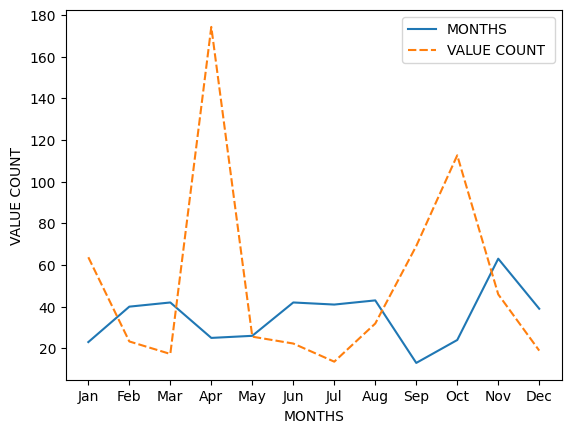

In [ ]:
# In which month do people book uber rides less frequently
df = pd.DataFrame({
      'MONTHS' : mon.values, # For Every Month Total
       'VALUE COUNT ' : data.groupby ('MONTH', sort = False)['MILES'].max ()   # Every Month Max Value
})

p= sns.lineplot (data= df) # Creating Line Plot
p.set (xlabel= 'MONTHS', ylabel = 'VALUE COUNT' )  # Axis Label


In [ ]:
# Ensure 'START_DATE' is in datetime format
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')

# Extract the weekday number (0 = Monday, 6 = Sunday)
data['DAY'] = data['START_DATE'].dt.weekday

# Define the mapping for day names
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Replace weekday numbers with day names
data['DAY'] = data['DAY'].map(day_label)



In [ ]:
data.head ()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,MONTH,DAY
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1.0,Jan,Fri
1,2016-01-02 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,1.0,Jan,Sat
2,2016-01-02 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1.0,Jan,Sat
3,2016-01-05 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1.0,Jan,Tues
4,2016-01-06 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1.0,Jan,Wed


Text(0, 0.5, 'COUNT')

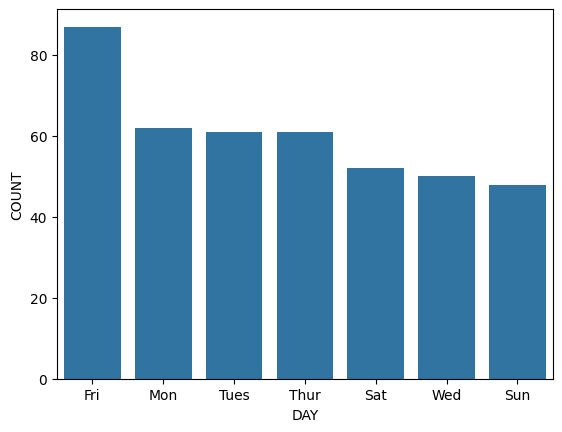

In [ ]:
# On which days of week do people book Uber rides most
day_label = data.DAY.value_counts ()

sns.barplot (x=day_label.index,y = day_label)
plt.xlabel ('DAY')
plt.ylabel ('COUNT')

In [ ]:
# How Many Miles People usually book a cab for Through Uber

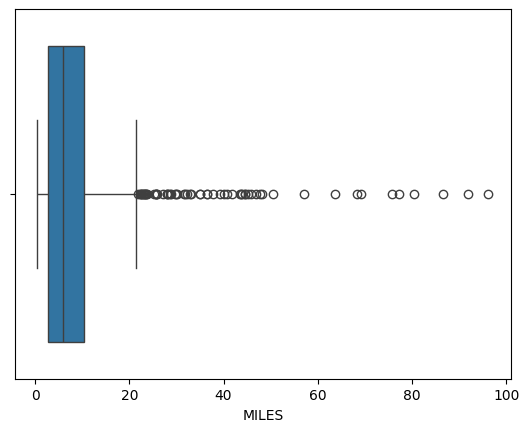

In [ ]:
# Filter the data where 'MILES' is less than 100
filtered_data = data[data['MILES'] < 100]

# Create a boxplot for the 'MILES' column
sns.boxplot(x=filtered_data['MILES'])

# Show the plot
plt.show()


<ipython-input-65-565008ca1e55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data[data['MILES']<40]['MILES'])


AttributeError: module 'seaborn' has no attribute 'show'

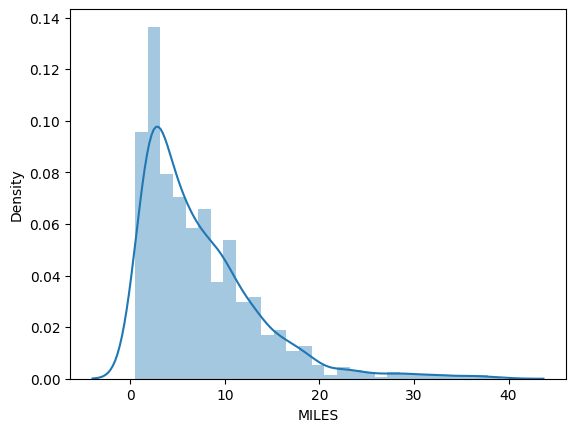

In [ ]:
sns.distplot (data[data['MILES']<40]['MILES'])